# Ensemble Machine Learning Algorithms   

## Table of Contents
1. Introduction to Ensemble Learning
2. Why Ensemble Methods Work
3. Types of Ensemble Methods
4. Bagging Methods
5. Boosting Methods
6. Stacking
7. Voting Classifiers
8. Practical Implementation with Code
9. When to Use Which Method

---

## 1. Introduction to Ensemble Learning

**What is Ensemble Learning?**
Ensemble learning is a machine learning technique that combines multiple models (called "base learners" or "weak learners") to create a stronger, more accurate predictive model. Think of it like asking multiple experts for their opinion and combining their answers to get a better decision.

**Key Terminology:**
- **Base Learner/Weak Learner**: Individual model in the ensemble (e.g., a single decision tree)
- **Strong Learner**: The combined ensemble model
- **Homogeneous Ensemble**: All base learners are of the same type
- **Heterogeneous Ensemble**: Base learners are of different types

---

## 2. Why Ensemble Methods Work

Ensemble methods work because they reduce three types of errors:

1. **Bias**: Error from overly simplistic assumptions
2. **Variance**: Error from sensitivity to training data variations
3. **Noise**: Random errors in data

**The Wisdom of Crowds Principle:**
If you have multiple models making independent predictions, their errors often cancel out, leading to better overall accuracy.

---

## 3. Types of Ensemble Methods

There are three main categories:

1. **Bagging (Bootstrap Aggregating)**: Train models in parallel on different subsets of data
2. **Boosting**: Train models sequentially, each correcting previous model's errors
3. **Stacking**: Combine different types of models using a meta-learner

---

## 4. Bagging Methods

### 4.1 Concept
Bagging creates multiple subsets of training data by random sampling with replacement (bootstrapping), trains a model on each subset, and combines predictions by voting (classification) or averaging (regression).

**Key Benefits:**
- Reduces variance
- Helps prevent overfitting
- Works well with high-variance models like decision trees

### 4.2 Random Forest

Random Forest is the most popular bagging algorithm. It builds multiple decision trees and combines their predictions.

**How it Works:**
1. Create multiple bootstrap samples from training data
2. For each sample, build a decision tree
3. At each split, consider only a random subset of features
4. Combine predictions by majority voting (classification) or averaging (regression)

**Important Parameters:**
- `n_estimators`: Number of trees in the forest
- `max_depth`: Maximum depth of each tree
- `max_features`: Number of features to consider at each split
- `bootstrap`: Whether to use bootstrap samples

**Code Example - Random Forest Classification:**



In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (0, 1, 2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=3,           # Maximum depth of trees
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Feature importance
feature_importance = rf_classifier.feature_importances_
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"{iris.feature_names[i]}: {importance:.4f}")

Random Forest Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Feature Importance:
sepal length (cm): 0.1023
sepal width (cm): 0.0251
petal length (cm): 0.4331
petal width (cm): 0.4396


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



tree_scores = []

for i, estimator in enumerate(rf_classifier.estimators_):
    preds = estimator.predict(X_test)
    acc = accuracy_score(y_test, preds)
    tree_scores.append(acc)
    print(f"Tree {i} Accuracy: {acc}")


Tree 0 Accuracy: 1.0
Tree 1 Accuracy: 1.0
Tree 2 Accuracy: 0.9555555555555556
Tree 3 Accuracy: 0.9555555555555556
Tree 4 Accuracy: 0.8666666666666667
Tree 5 Accuracy: 0.9777777777777777
Tree 6 Accuracy: 0.9555555555555556
Tree 7 Accuracy: 0.9555555555555556
Tree 8 Accuracy: 0.9777777777777777
Tree 9 Accuracy: 0.9555555555555556
Tree 10 Accuracy: 0.9777777777777777
Tree 11 Accuracy: 1.0
Tree 12 Accuracy: 1.0
Tree 13 Accuracy: 1.0
Tree 14 Accuracy: 0.9777777777777777
Tree 15 Accuracy: 0.9333333333333333
Tree 16 Accuracy: 0.9333333333333333
Tree 17 Accuracy: 0.8
Tree 18 Accuracy: 1.0
Tree 19 Accuracy: 0.9555555555555556
Tree 20 Accuracy: 0.9777777777777777
Tree 21 Accuracy: 0.9777777777777777
Tree 22 Accuracy: 0.9777777777777777
Tree 23 Accuracy: 1.0
Tree 24 Accuracy: 1.0
Tree 25 Accuracy: 0.9555555555555556
Tree 26 Accuracy: 1.0
Tree 27 Accuracy: 0.9555555555555556
Tree 28 Accuracy: 1.0
Tree 29 Accuracy: 0.9555555555555556
Tree 30 Accuracy: 0.9777777777777777
Tree 31 Accuracy: 0.95555555

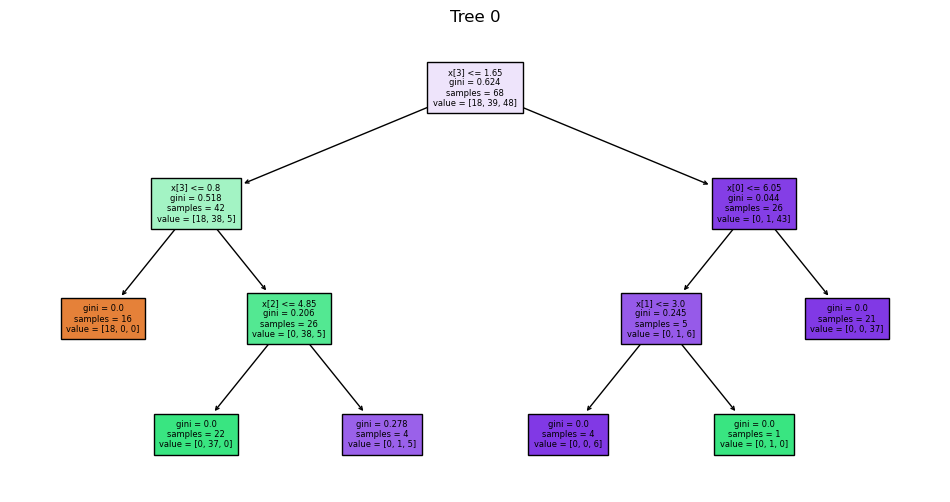

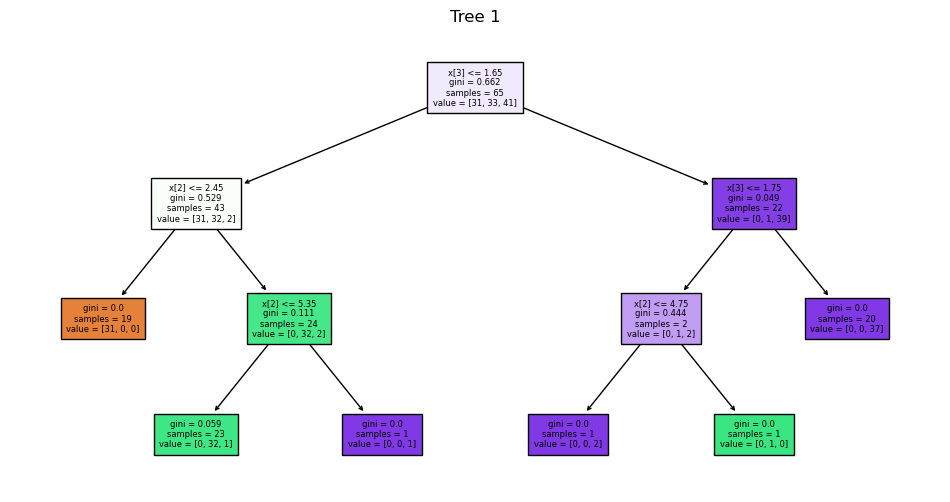

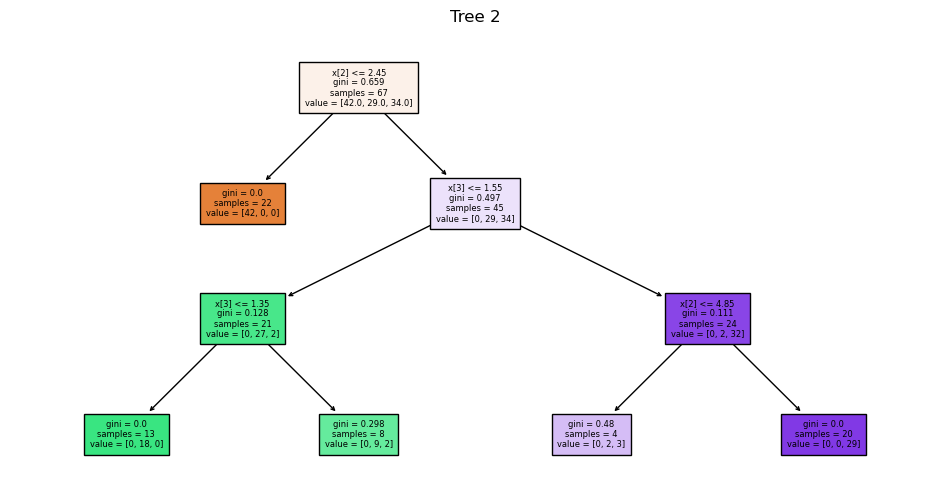

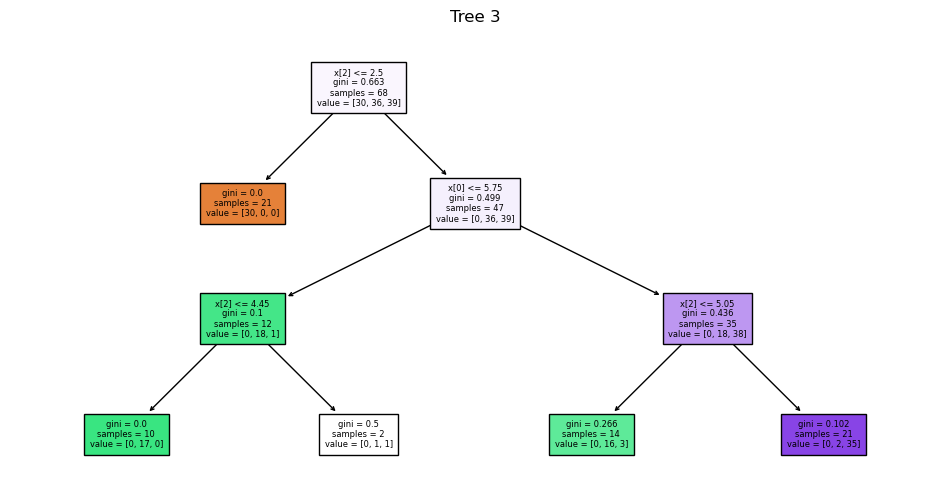

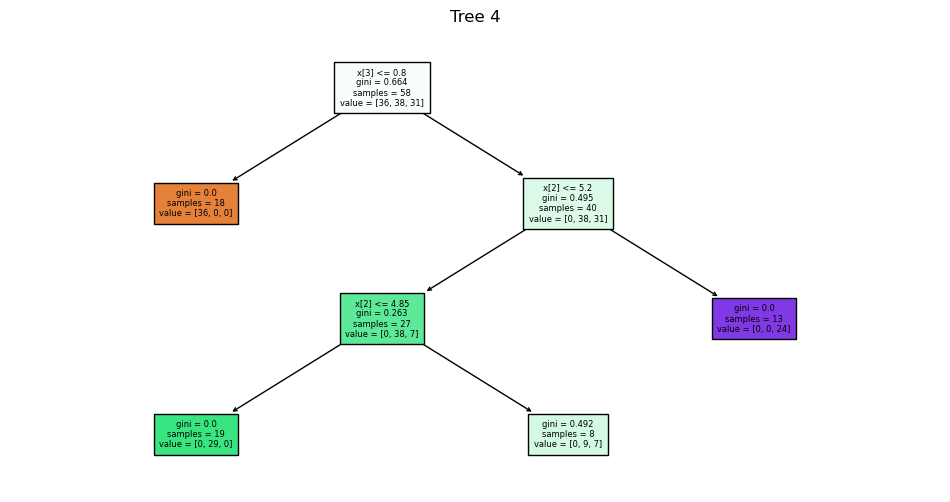

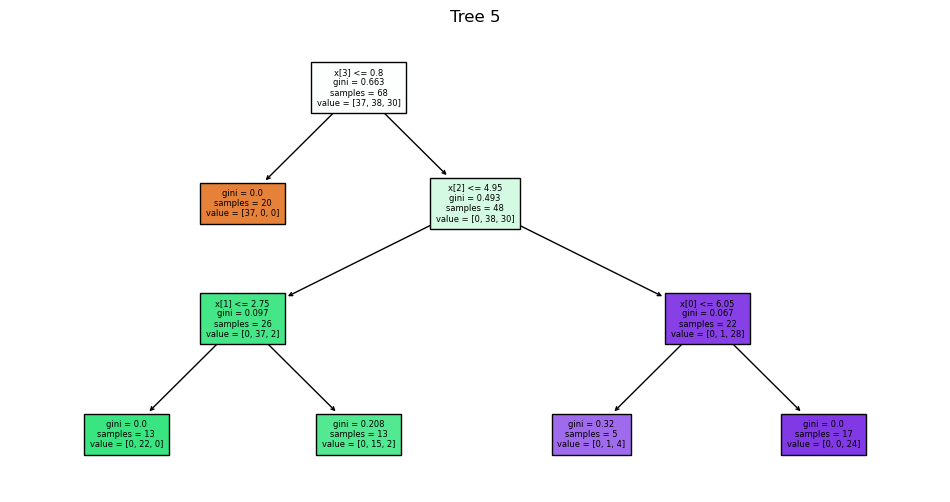

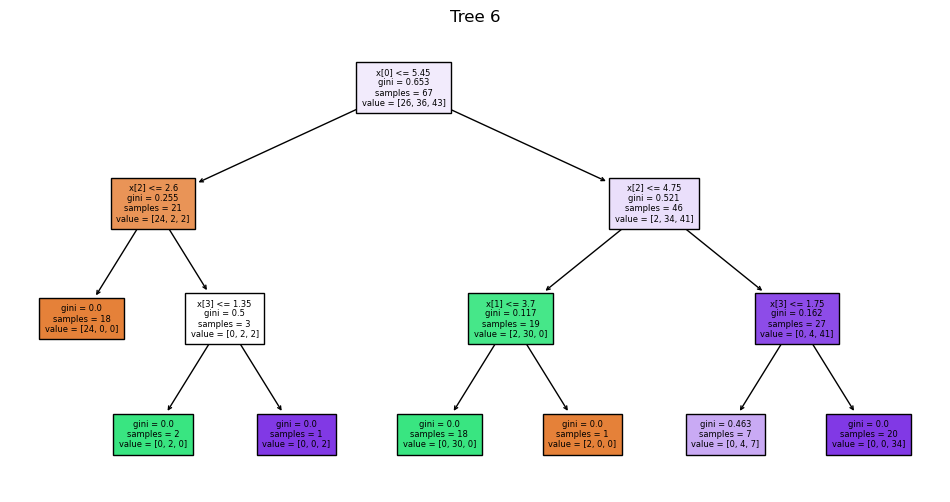

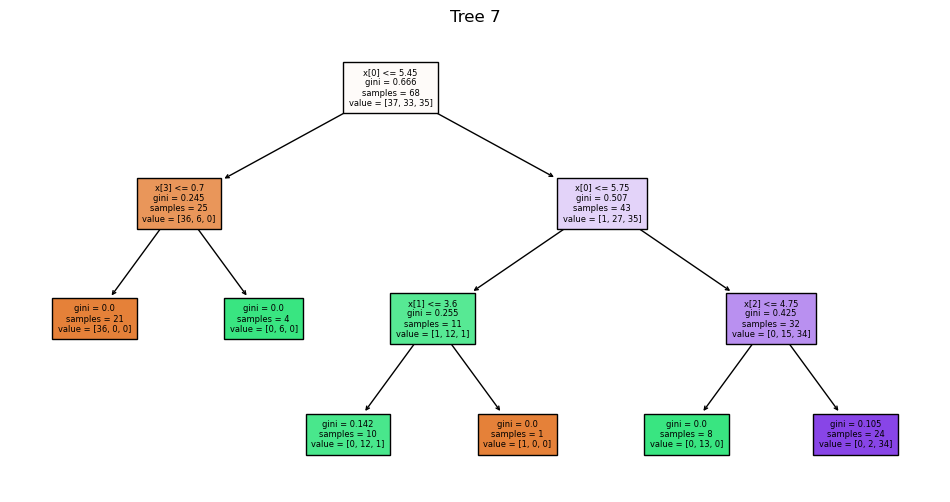

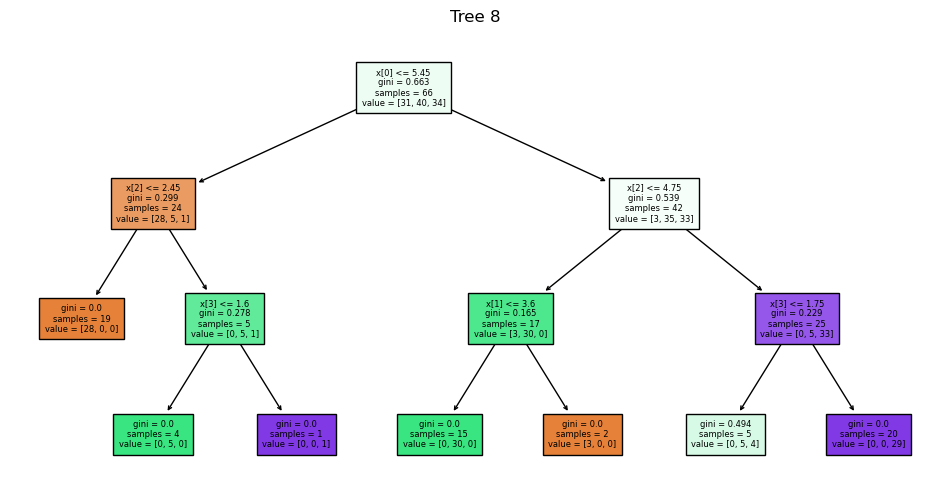

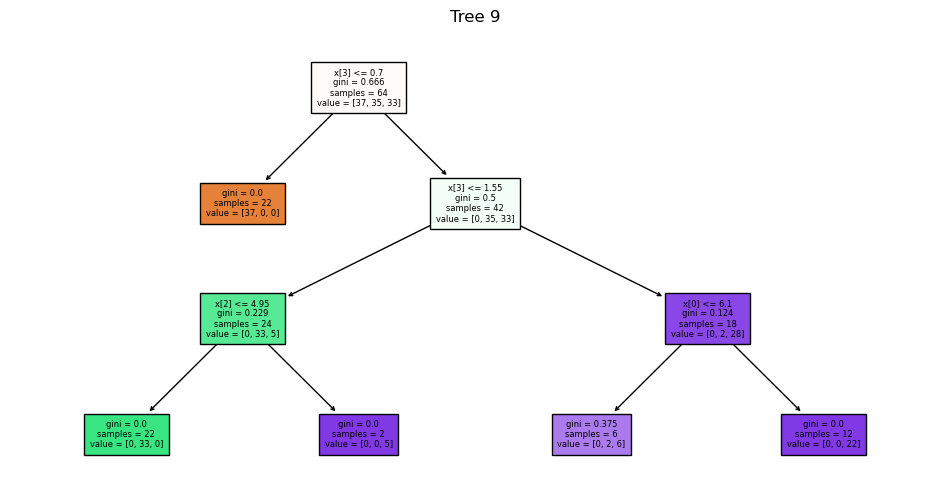

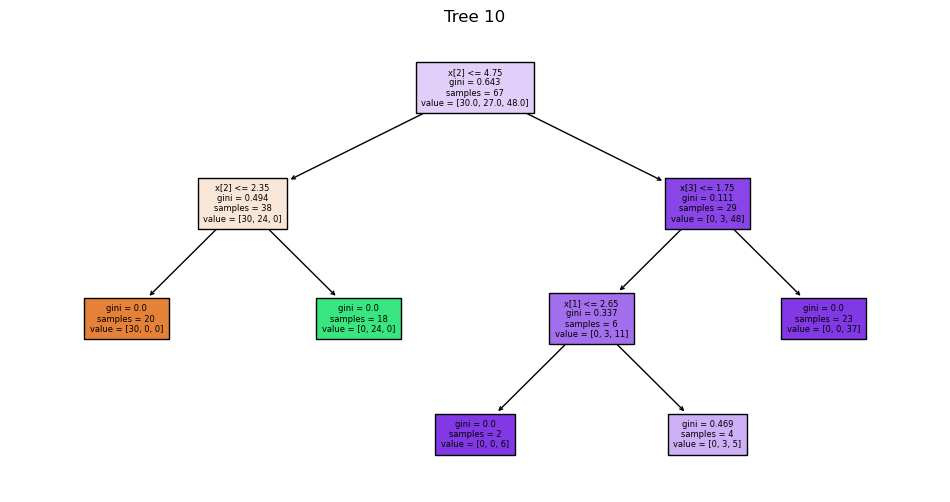

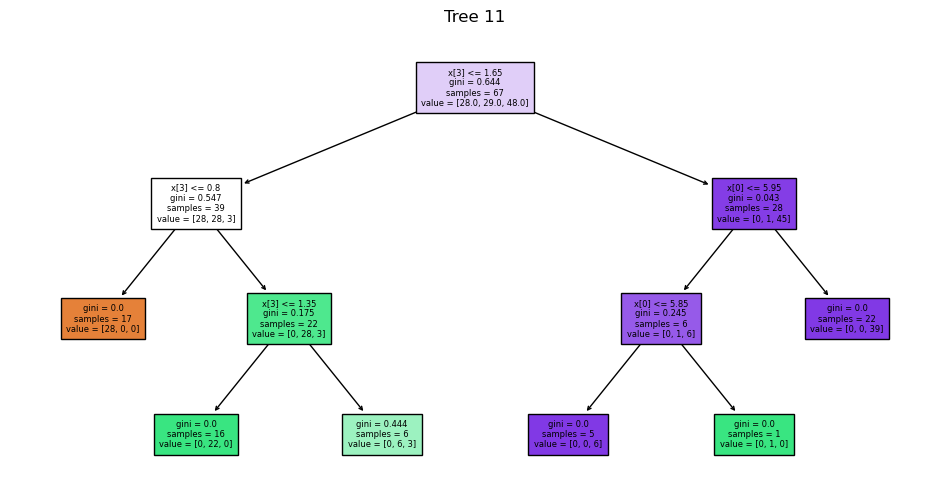

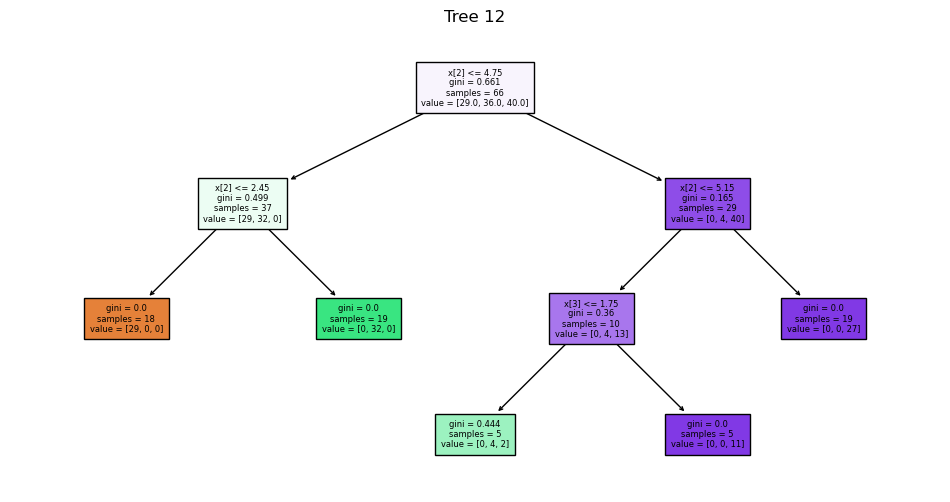

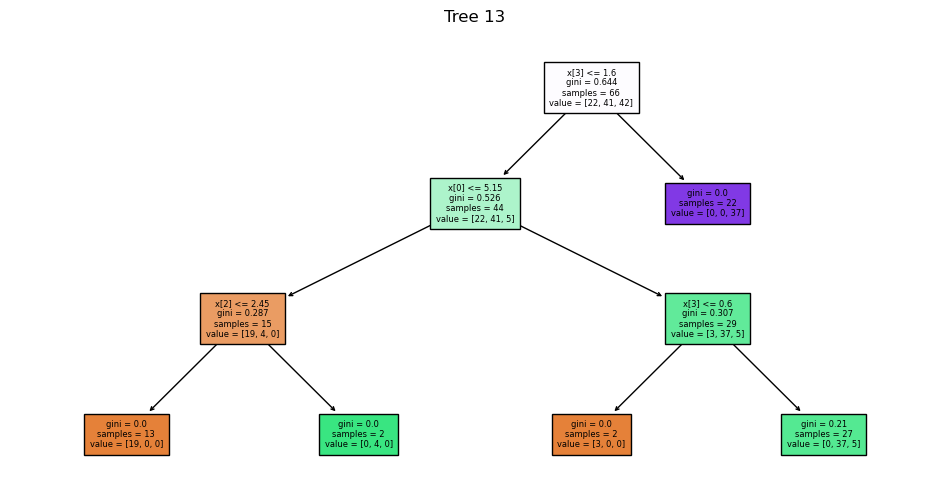

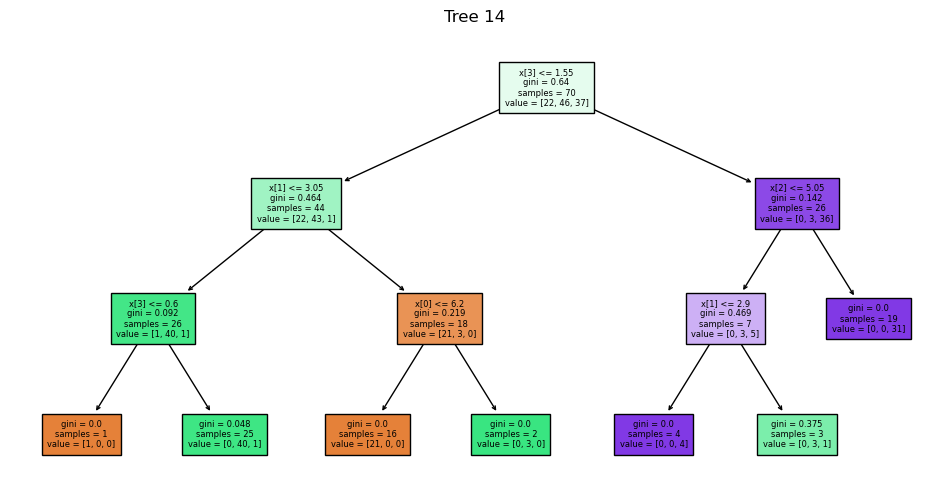

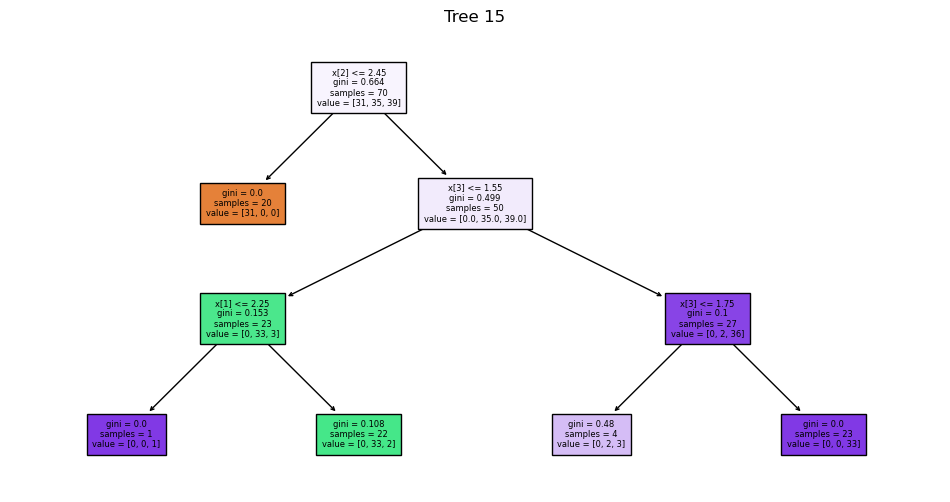

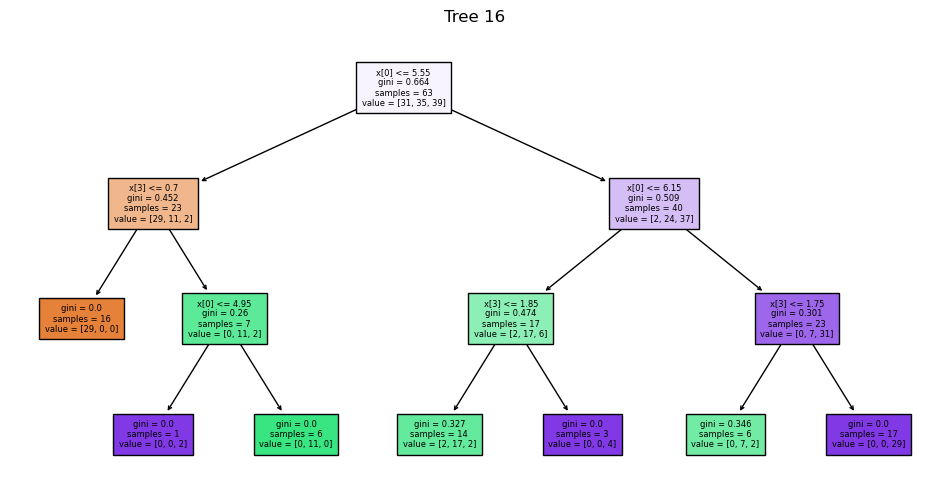

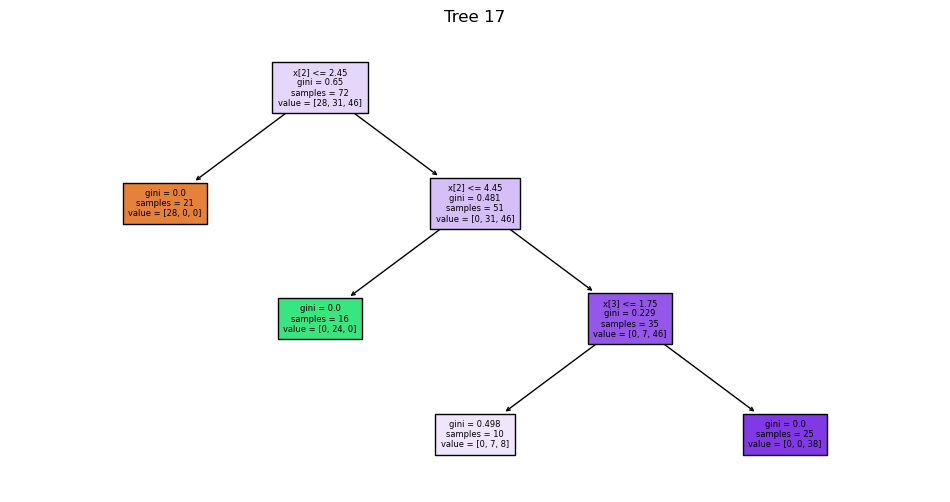

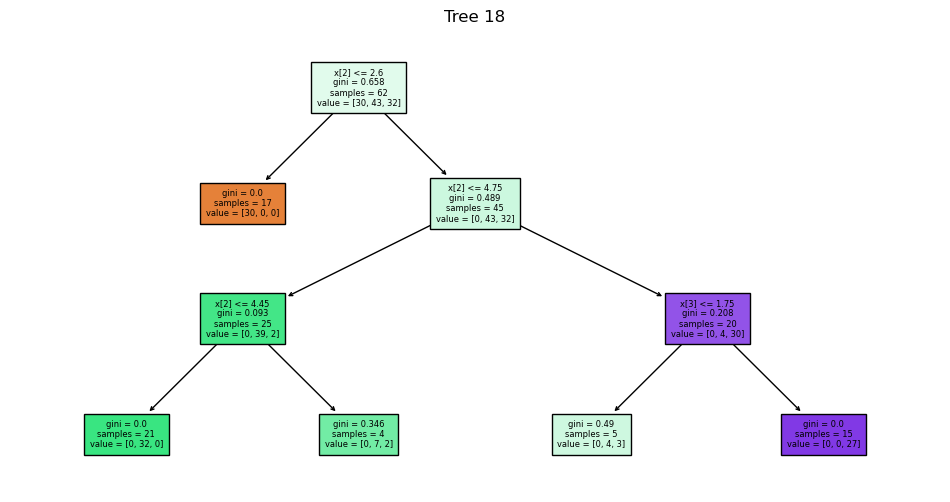

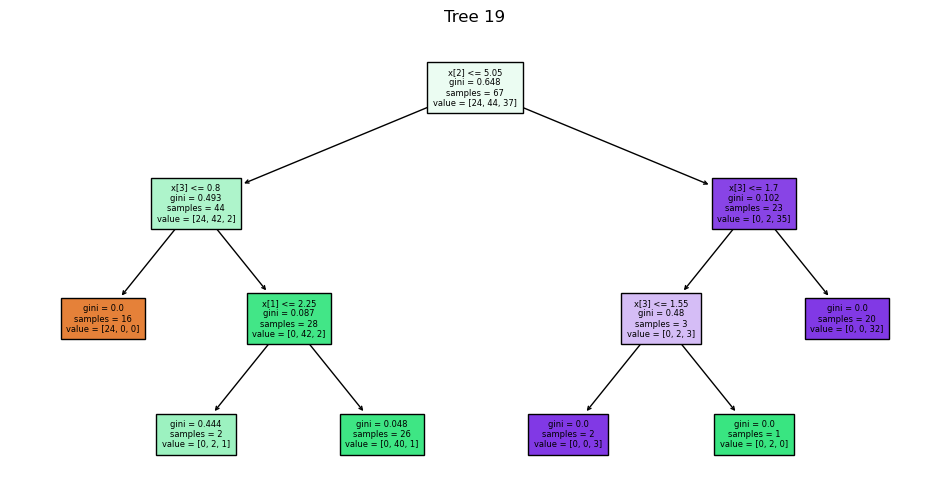

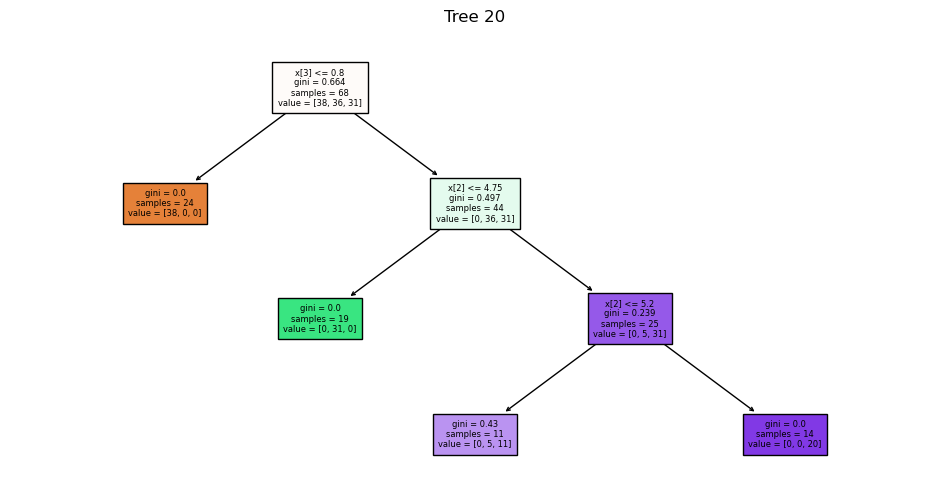

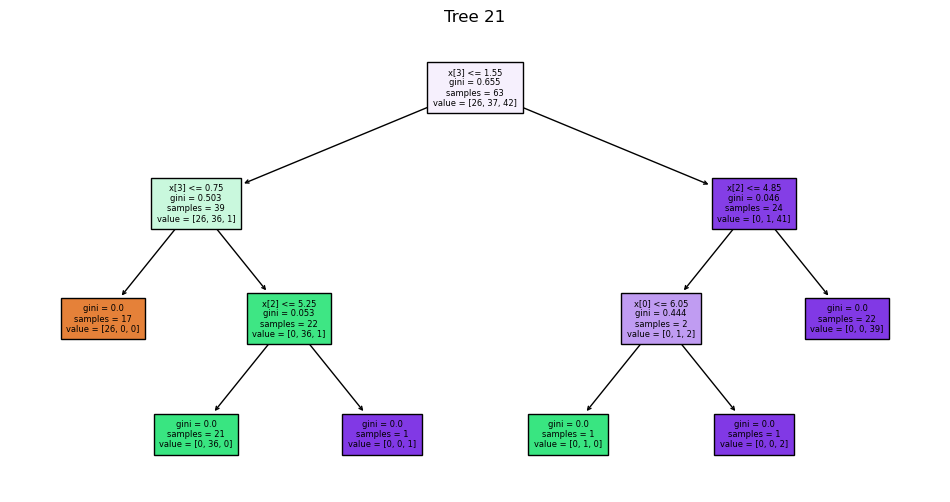

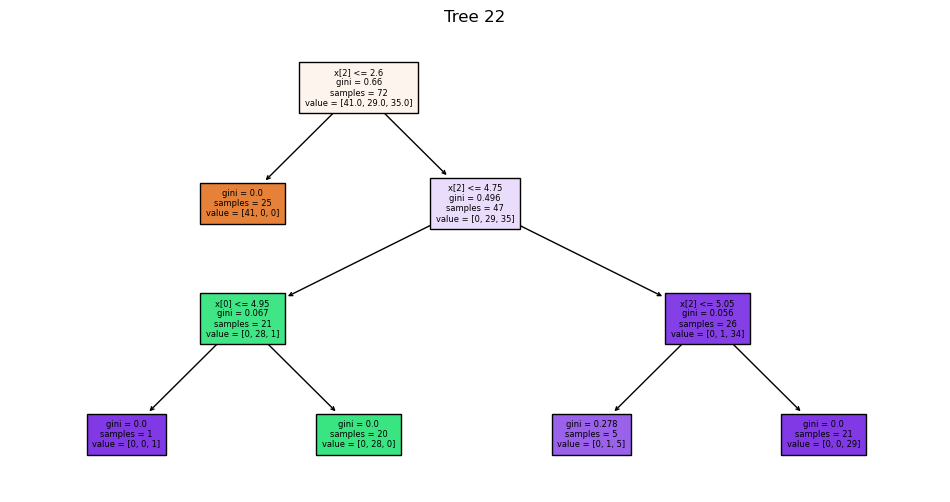

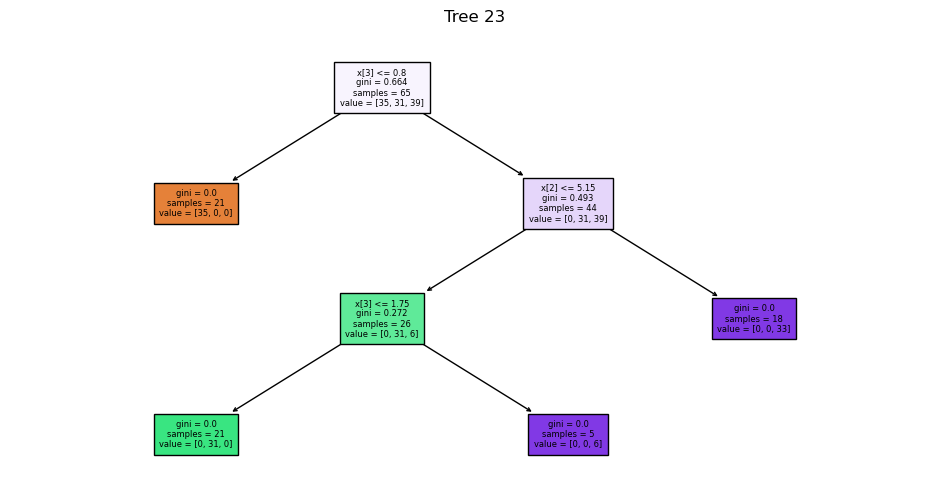

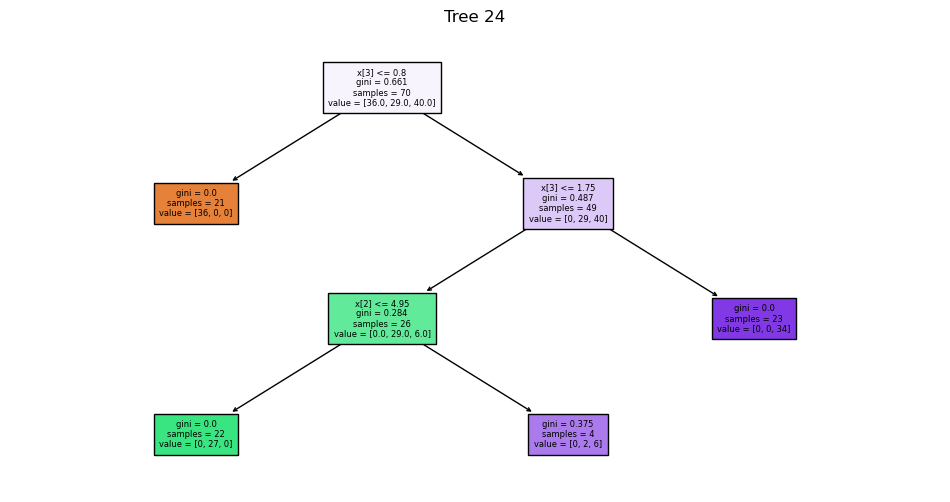

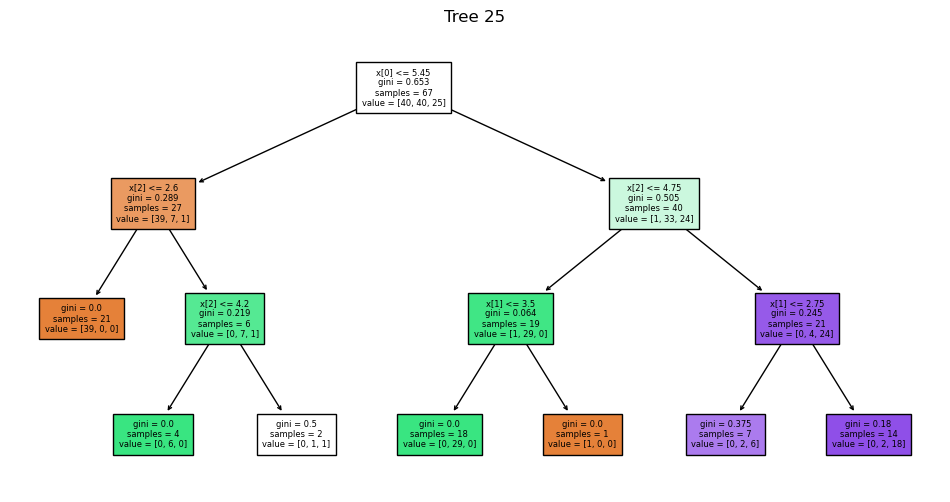

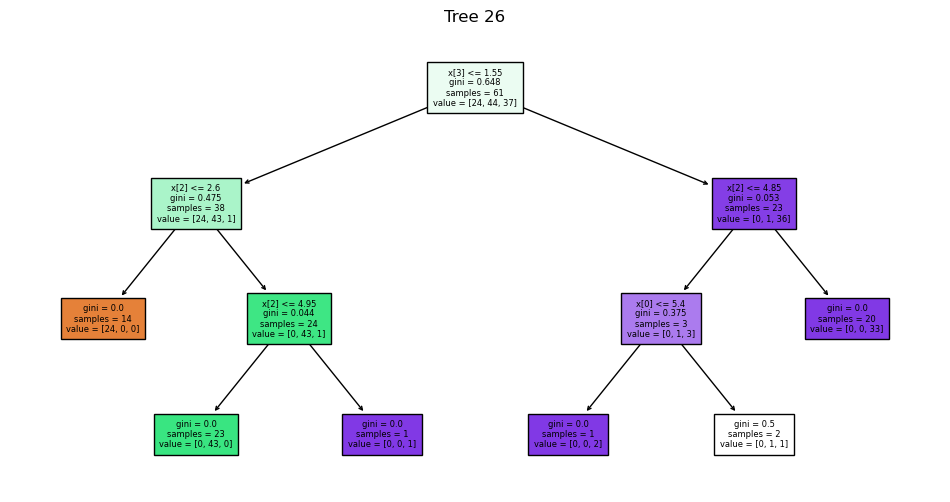

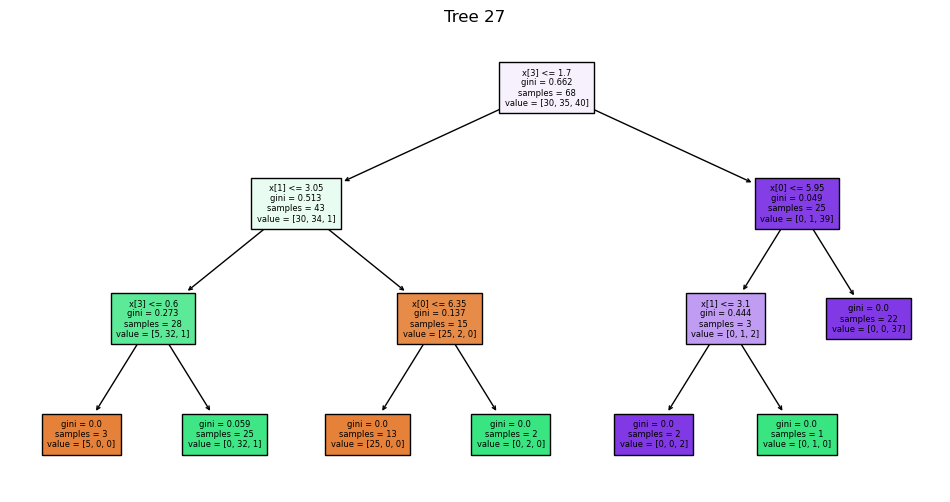

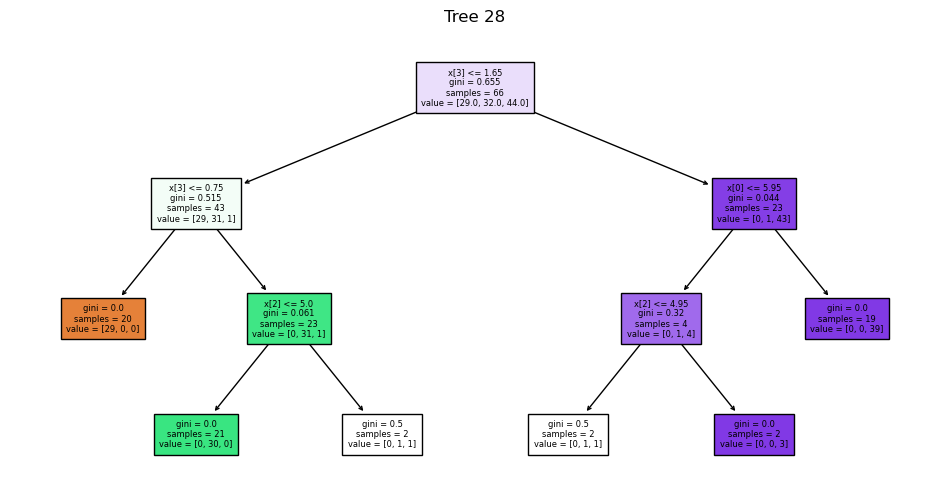

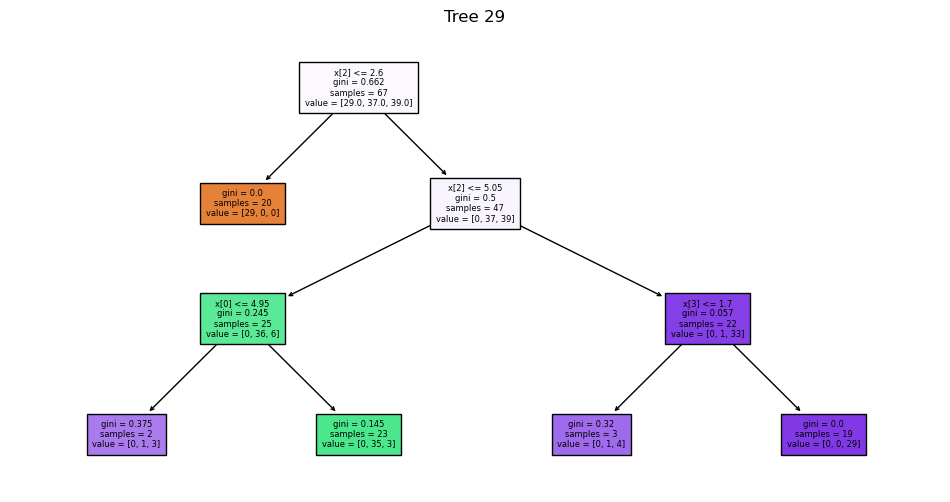

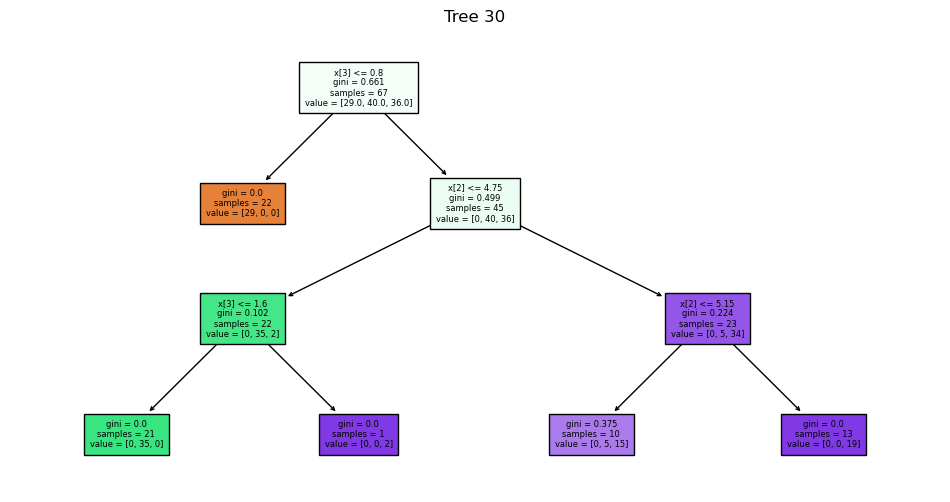

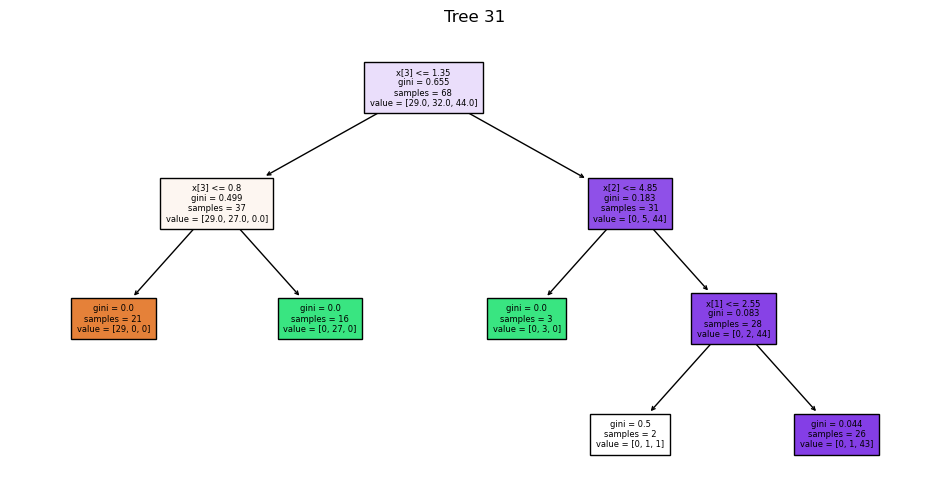

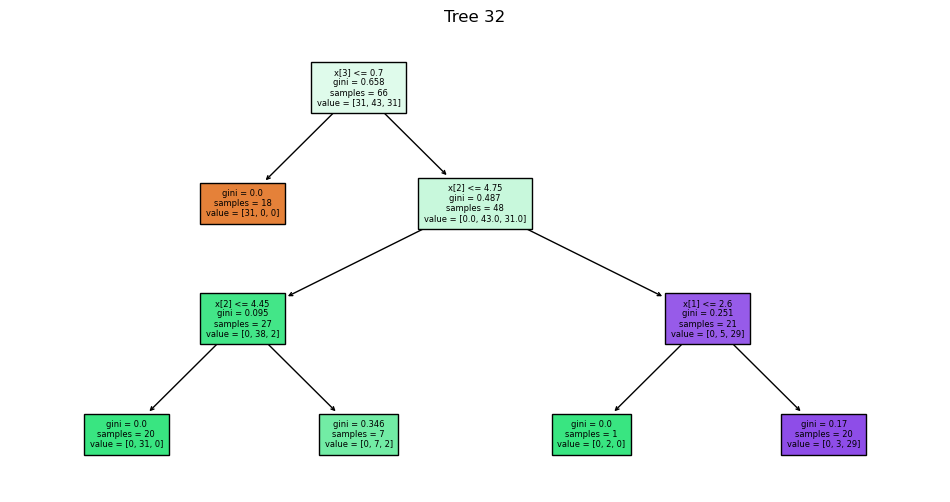

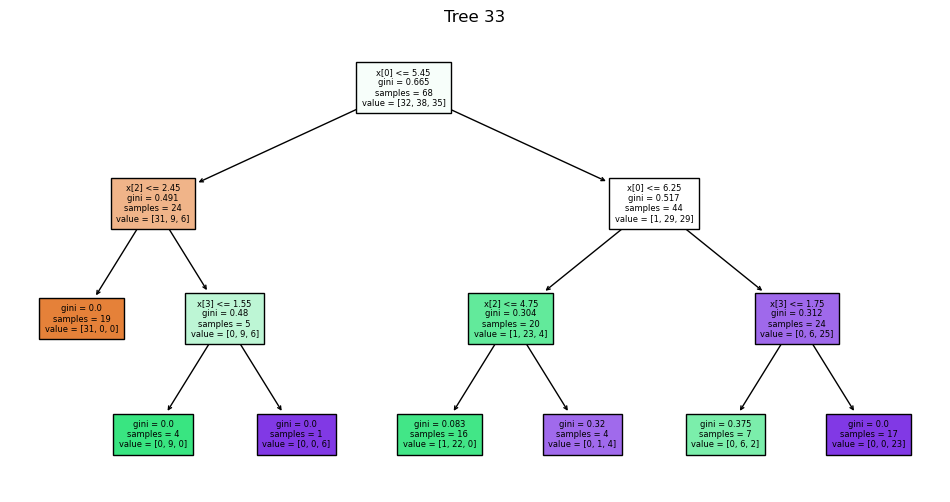

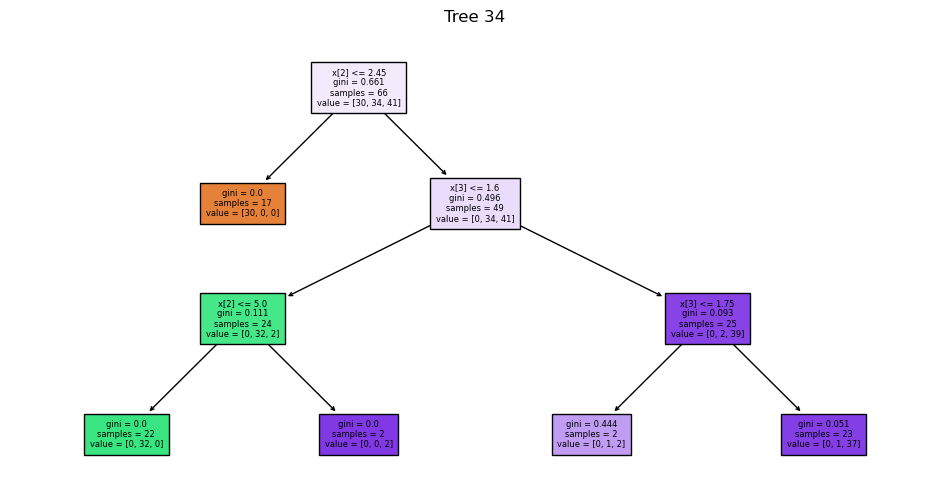

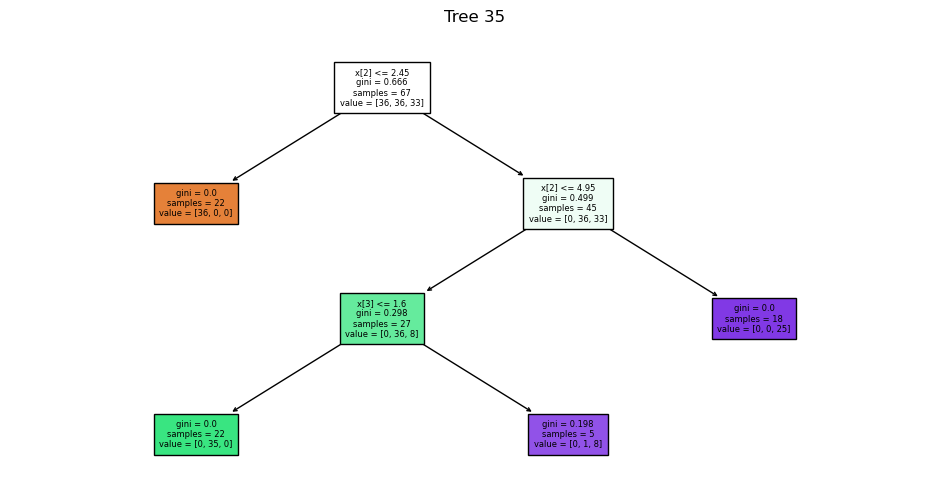

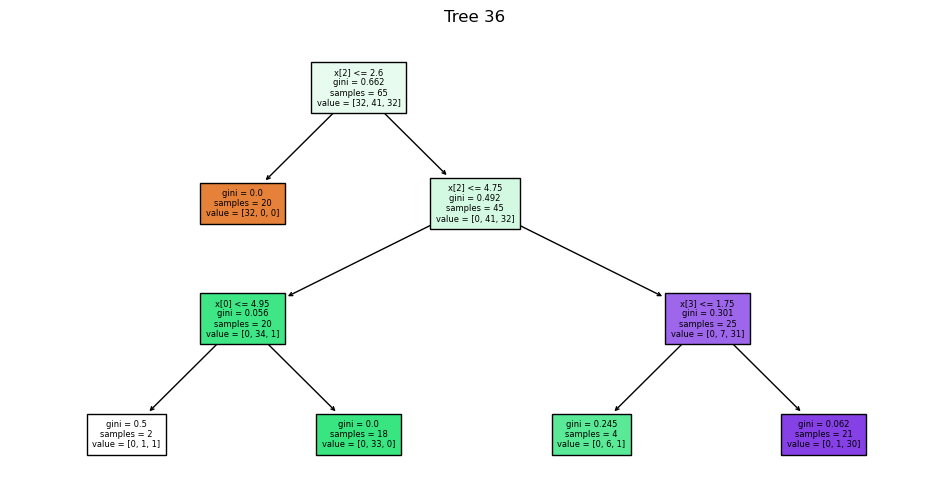

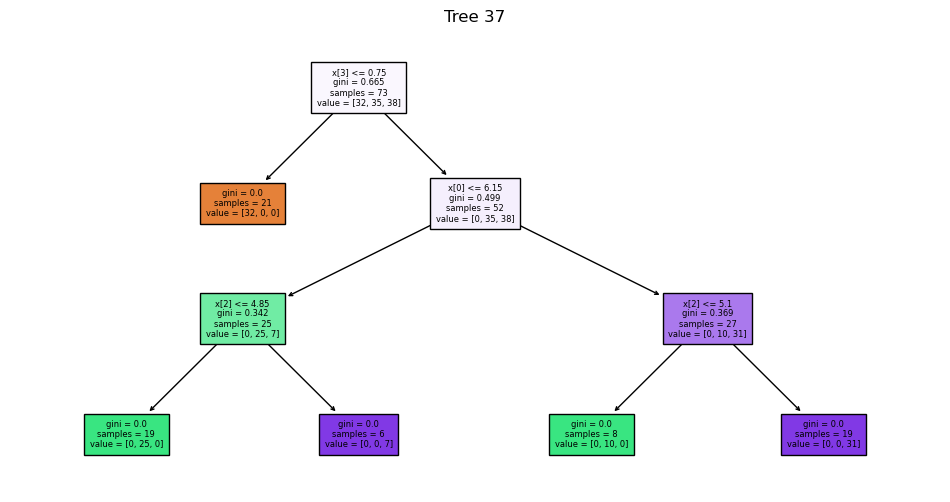

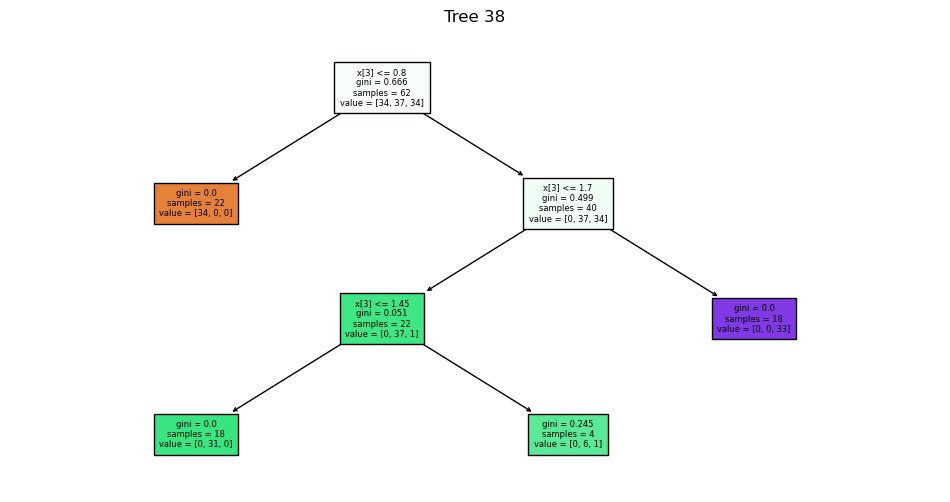

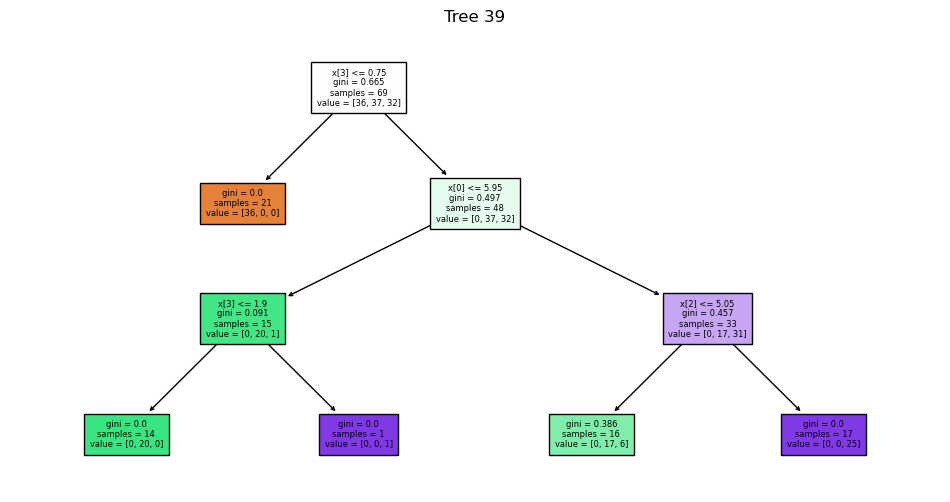

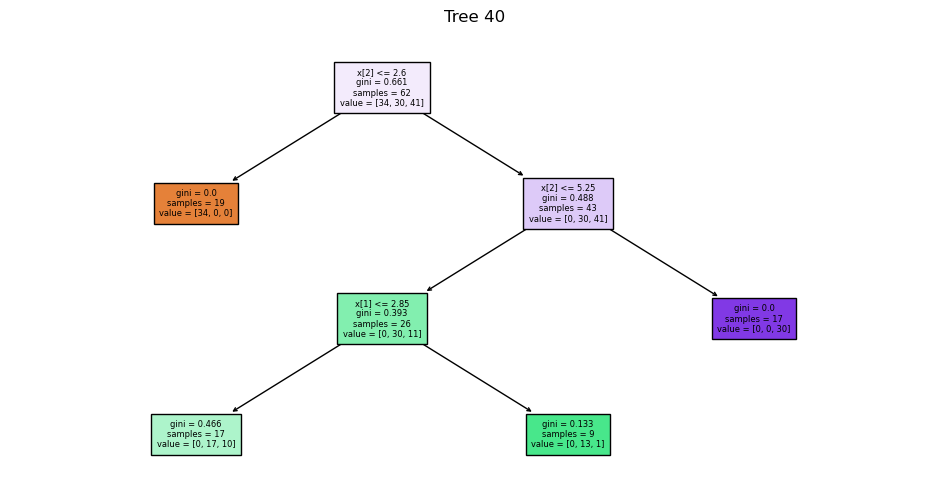

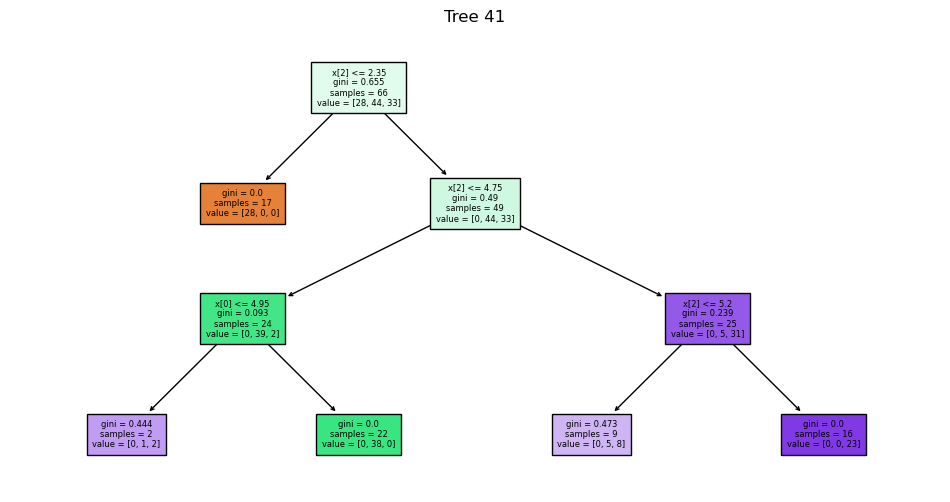

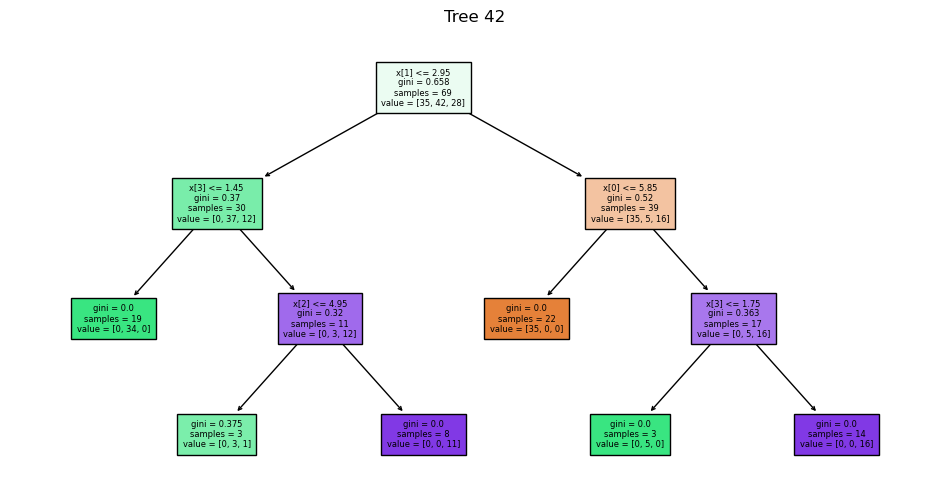

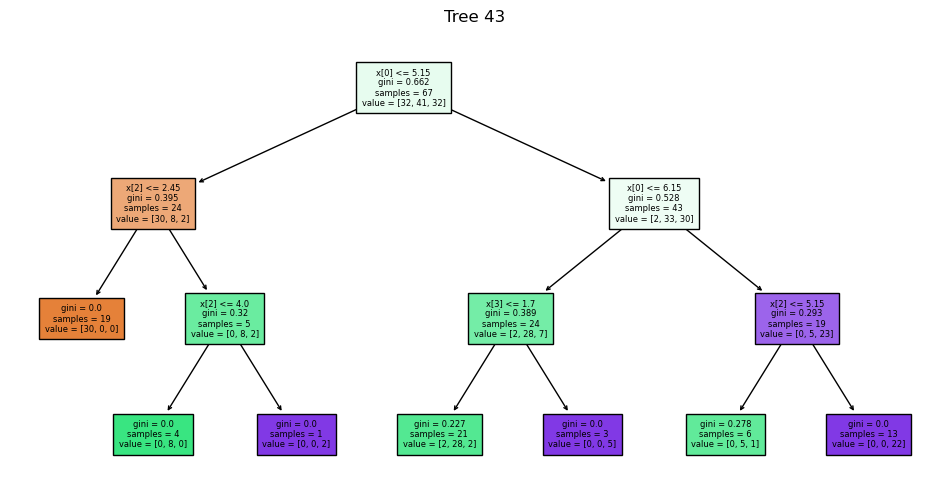

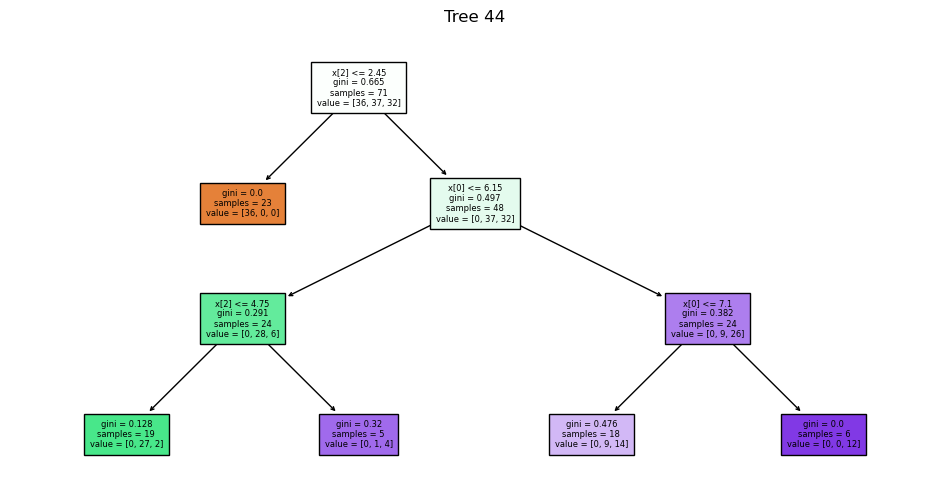

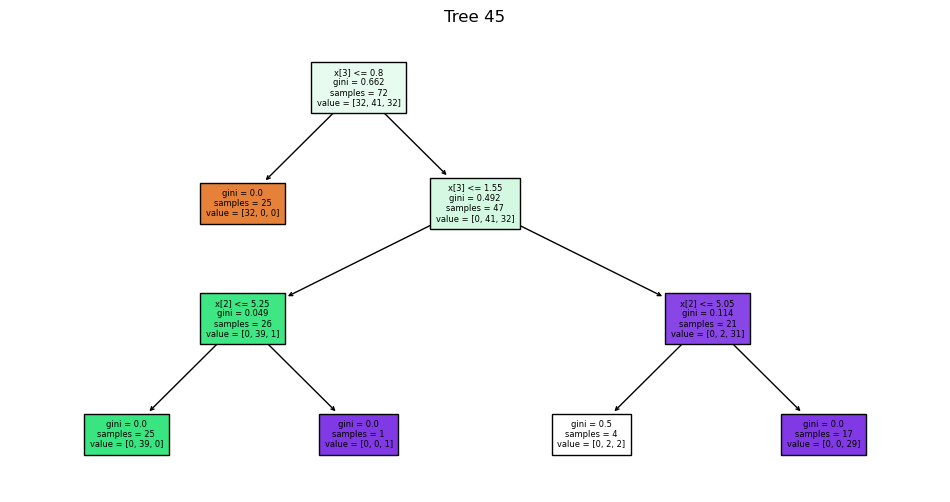

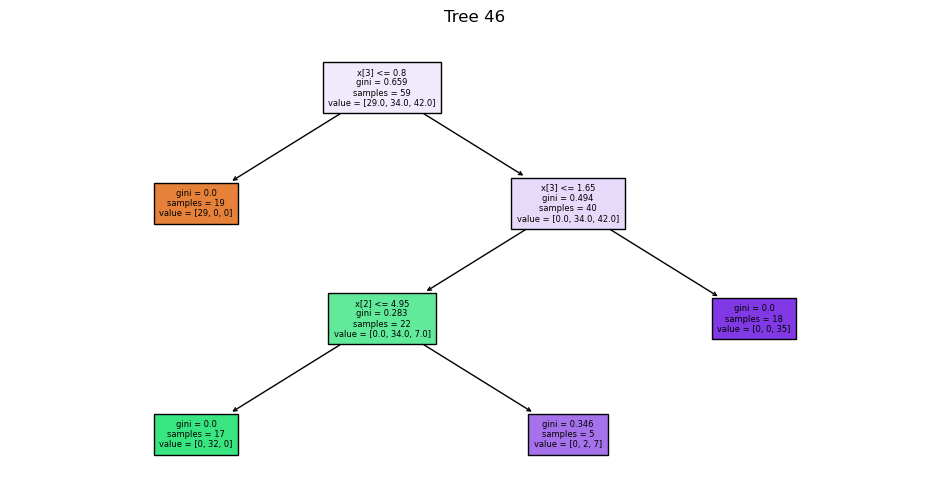

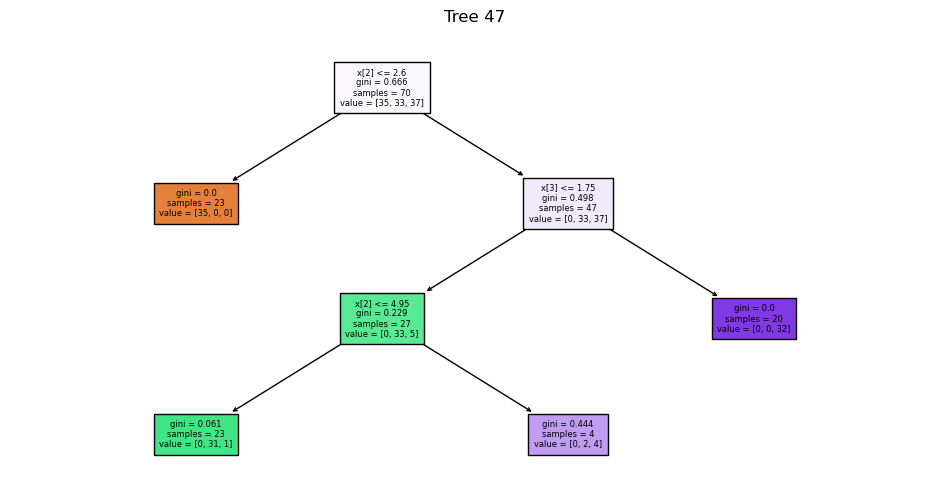

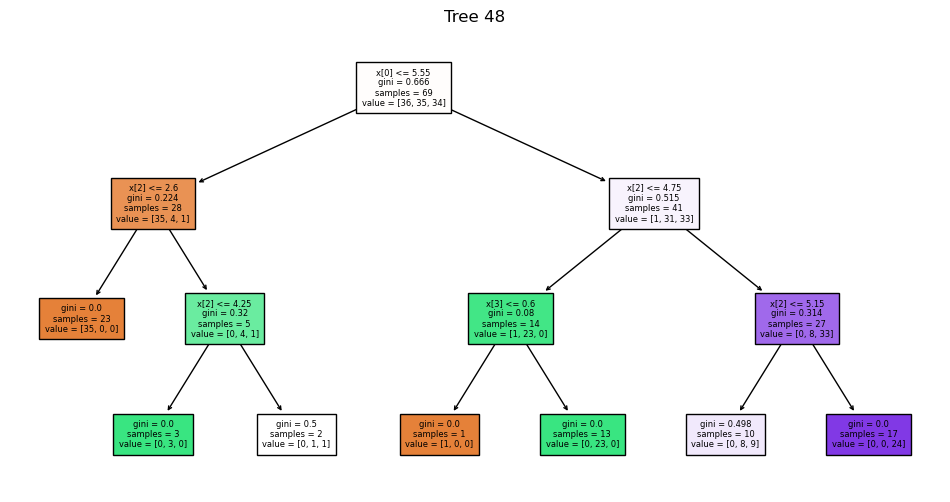

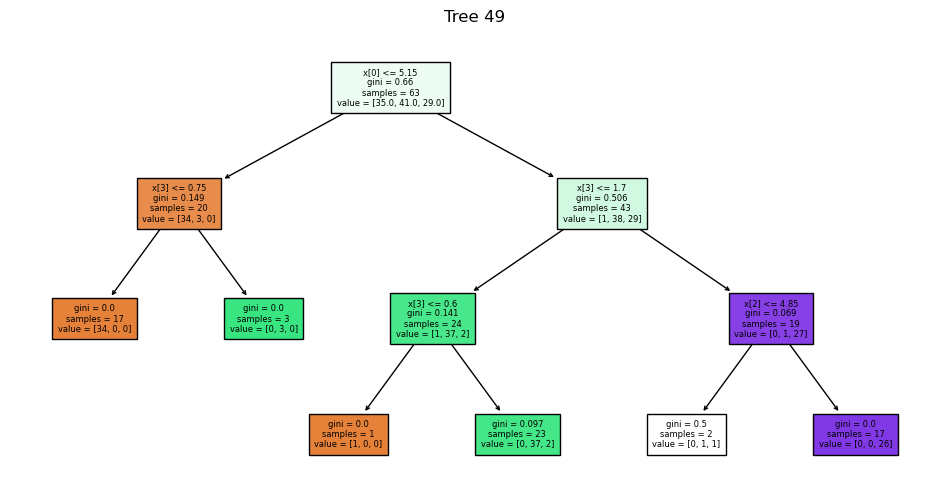

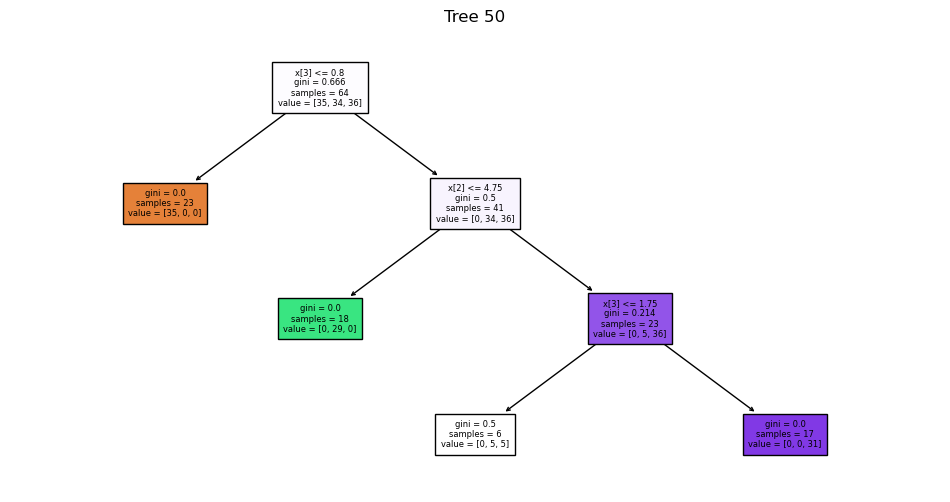

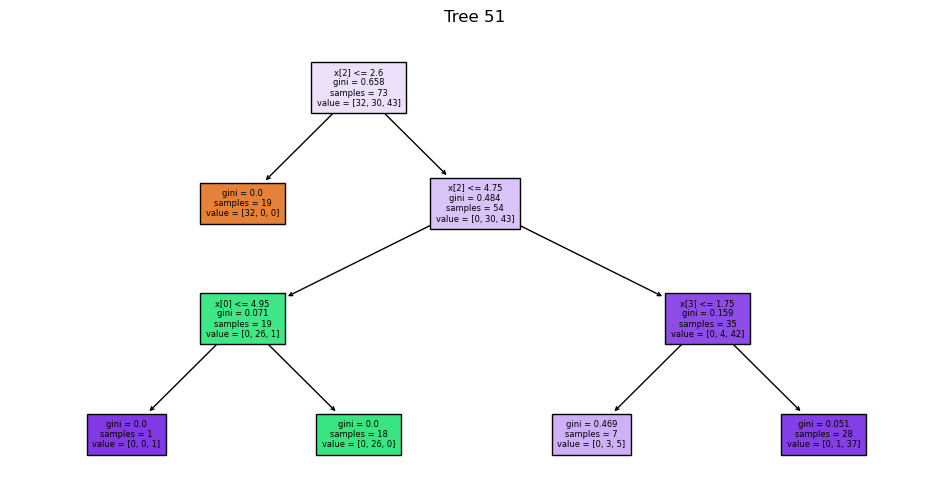

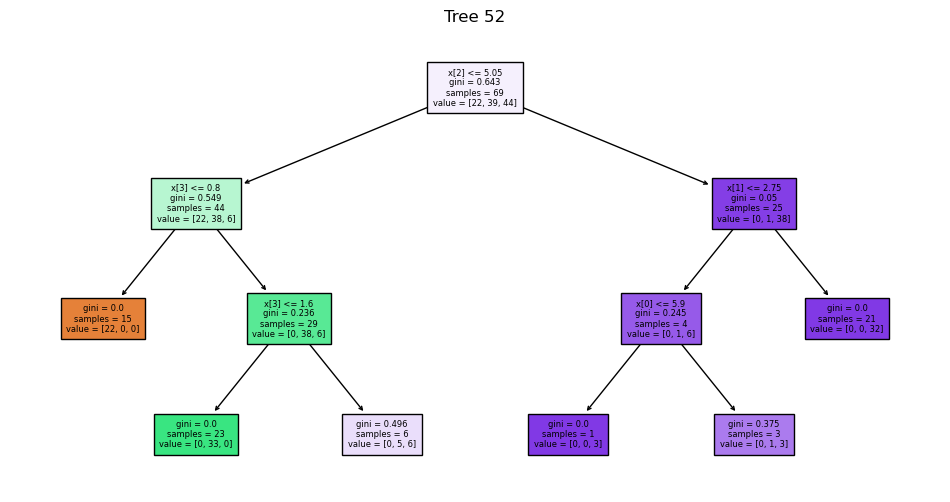

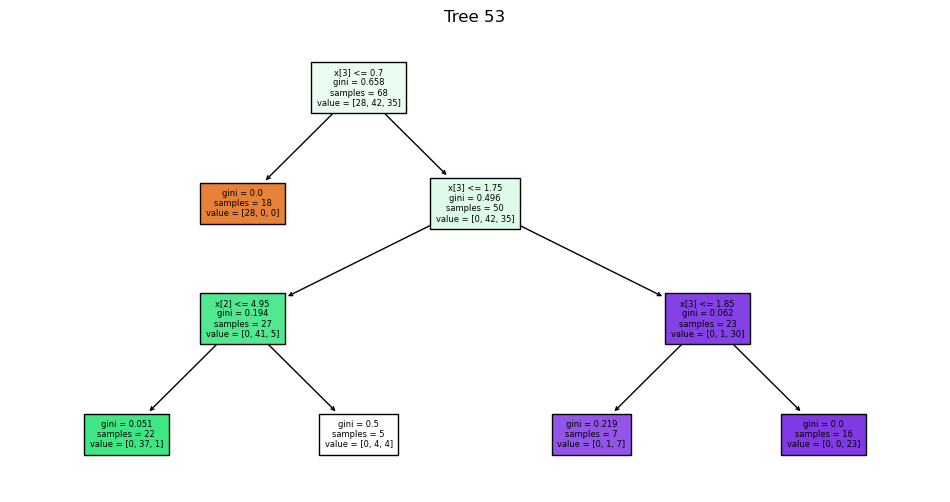

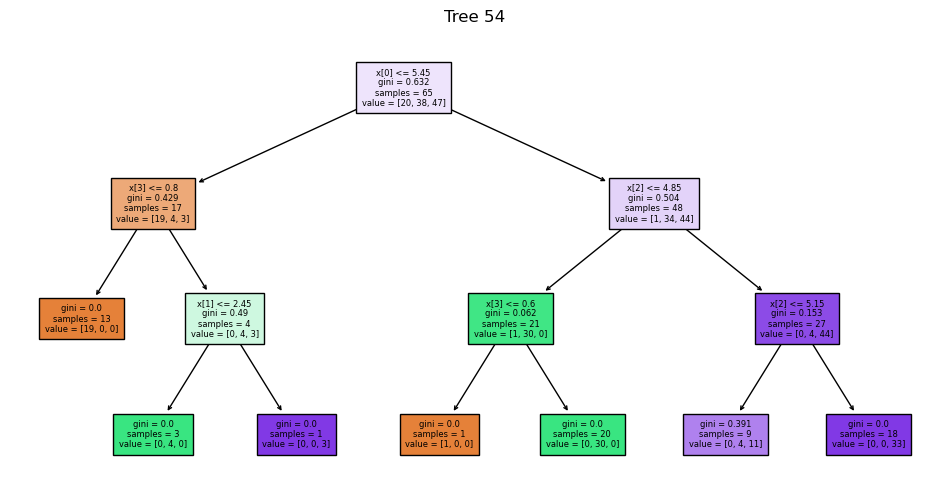

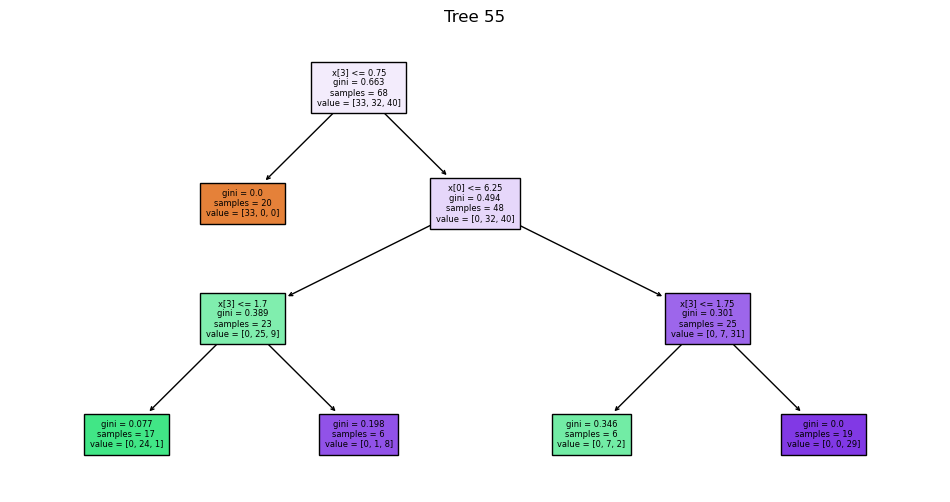

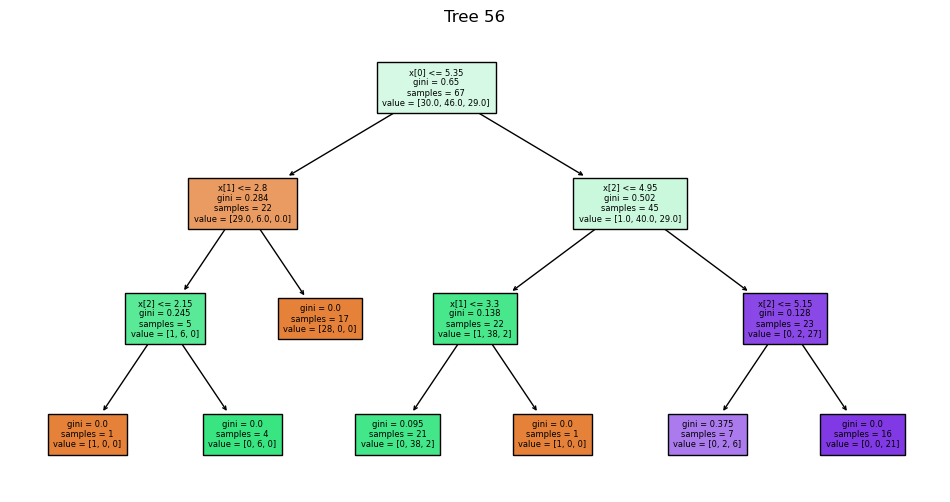

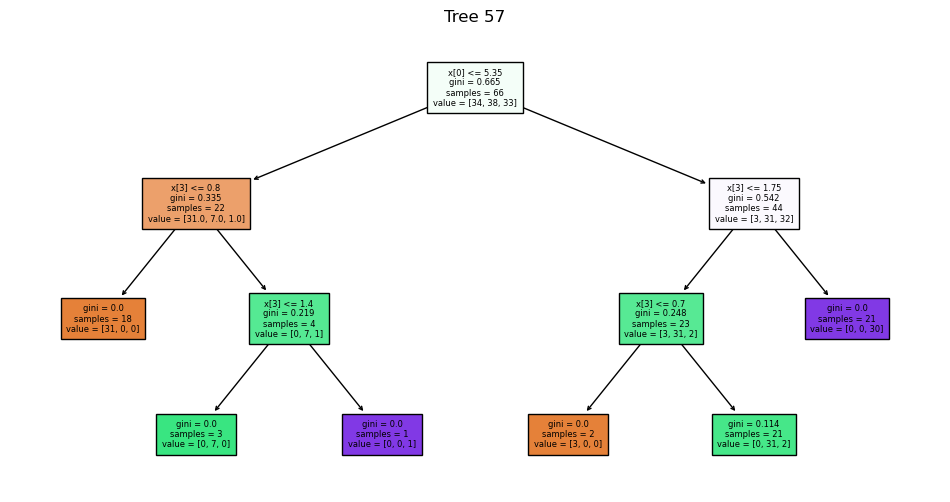

KeyboardInterrupt: 

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt



# Draw each tree
for i, estimator in enumerate(rf_classifier.estimators_):
    plt.figure(figsize=(12, 6))
    tree.plot_tree(estimator, filled=True, fontsize=6)
    plt.title(f"Tree {i}")
    plt.show()




**Code Example - Random Forest Regression:**



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regression MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")



### 4.3 Bagging Classifier

A general bagging implementation that can work with any base estimator.

**Code Example:**



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine

# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,           # Number of base estimators
    max_samples=0.8,           # 80% of samples for each estimator
    max_features=0.8,          # 80% of features for each estimator
    bootstrap=True,            # Sample with replacement
    random_state=42
)

# Train
bagging_clf.fit(X_train, y_train)

# Predict
y_pred = bagging_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")



---

## 5. Boosting Methods

### 5.1 Concept

Boosting trains models sequentially, where each new model focuses on correcting the errors made by previous models. Models are weighted based on their performance.

**Key Benefits:**
- Reduces bias and variance
- Often achieves higher accuracy than bagging
- Good for weak learners

**Key Difference from Bagging:**
- Bagging: Parallel training, independent models
- Boosting: Sequential training, dependent models

### 5.2 AdaBoost (Adaptive Boosting)



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train
adaboost_clf.fit(X_train, y_train)

# Predict
y_pred = adaboost_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

# Feature importance
print("Top 5 Important Features:")
feature_importance = adaboost_clf.feature_importances_
indices = np.argsort(feature_importance)[-5:]
for i in indices:
    print(f"{cancer.feature_names[i]}: {feature_importance[i]:.4f}")



### 5.3 Gradient Boosting



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# Classification Example
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_classifier.fit(X_train_iris, y_train_iris)
y_pred_gb = gb_classifier.predict(X_test_iris)

print(f"Gradient Boosting Classification Accuracy: {accuracy_score(y_test_iris, y_pred_gb):.4f}")

# Regression Example
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_regressor.fit(X_train, y_train)  # Using diabetes data from earlier
y_pred_gb_reg = gb_regressor.predict(X_test)
print(f"Gradient Boosting Regression R² Score: {r2_score(y_test, y_pred_gb_reg):.4f}")



### 5.4 XGBoost (Extreme Gradient Boosting)



In [ ]:
# Note: Install xgboost first: pip install xgboost
try:
    import xgboost as xgb

    # Create XGBoost Classifier
    xgb_classifier = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        random_state=42
    )

    xgb_classifier.fit(X_train_iris, y_train_iris)
    y_pred_xgb = xgb_classifier.predict(X_test_iris)

    print(f"XGBoost Accuracy: {accuracy_score(y_test_iris, y_pred_xgb):.4f}")

except ImportError:
    print("XGBoost not installed. Install with: pip install xgboost")



---

## 6. Stacking (Stacked Generalization)



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=42
)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5  # Cross-validation folds
)

# Train
stacking_clf.fit(X_train_wine, y_train_wine)

# Predict
y_pred_stack = stacking_clf.predict(X_test_wine)

# Evaluate
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test_wine, y_pred_stack):.4f}")

# Compare with individual models
for name, model in base_learners:
    model.fit(X_train_wine, y_train_wine)
    y_pred_individual = model.predict(X_test_wine)
    print(f"{name} Accuracy: {accuracy_score(y_test_wine, y_pred_individual):.4f}")



---

## 7. Voting Classifiers



In [ ]:
from sklearn.ensemble import VotingClassifier

# Create individual classifiers
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
clf3 = SVC(probability=True, random_state=42)

# Hard Voting
hard_voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)],
    voting='hard'
)

hard_voting_clf.fit(X_train_wine, y_train_wine)
y_pred_hard = hard_voting_clf.predict(X_test_wine)
print(f"Hard Voting Accuracy: {accuracy_score(y_test_wine, y_pred_hard):.4f}")

# Soft Voting
soft_voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)],
    voting='soft'
)

soft_voting_clf.fit(X_train_wine, y_train_wine)
y_pred_soft = soft_voting_clf.predict(X_test_wine)
print(f"Soft Voting Accuracy: {accuracy_score(y_test_wine, y_pred_soft):.4f}")



---

## 9. When to Use Which Method

### Decision Guide:

**Use Random Forest when:**
- You have high-variance data
- You need feature importance
- You want a robust, easy-to-use model
- You don't have time for extensive tuning

**Use AdaBoost when:**
- You have weak learners that are slightly better than random
- Your data has some noise but not too much
- You need interpretability

**Use Gradient Boosting when:**
- You want maximum accuracy
- You can afford longer training time
- You need to tune hyperparameters carefully
- Your data is relatively clean

**Use Bagging when:**
- You have an unstable model (high variance)
- You want to reduce overfitting
- You can train models in parallel

**Use Stacking when:**
- You want to combine different types of models
- You have time for complex training
- You need the absolute best performance

**Use Voting when:**
- You want a simple ensemble
- You have multiple good models
- You want interpretability
